In [73]:
import arviz as az
import matplotlib.pyplot as plt
from fitting import FitModel
import pymc3 as pm
from scipy import stats
import numpy as np

In [2]:
params = {}
params['core_shell'] = { 'Li': False, 'Ni': False, 'O': True }
params['charges'] = {'Li': +1.0,
                     'Ni': +3.0,
                     'O': {'core':  +0.960,
                           'shell': -2.960}}
params['masses'] = {'Li': 6.941,
                    'Ni': 58.6934,
                    'O': {'core': 14.3991,
                          'shell': 1.5999} }

params['cs_springs'] = {'O' : [100.0, 0.0]}

distribution = {}
distribution['Li-O'] = {'bpp' : [691.229, 0.269, 0.0],
                        'sd' : [80, 0.01, 0.01]}

distribution['Ni-O'] = {'bpp' : [591.665, 0.382, 0.000],
                        'sd'  : [80, 0.01, 0.01]}

distribution['O-O'] = {'bpp' : [22739.211, 0.146, 67.764],
                       'sd'  : [200, 0.01, 5]}

excude_from_fit = [] # string of atom1_atom2_param. Example of format = 'O_O_rho'

In [4]:
fit_data = FitModel.collect_info(params, distribution,  supercell=[1,1,1])

Found elements: ['Li', 'Ni', 'O']
Found elements: ['Li', 'Ni', 'O']
Found elements: ['Li', 'Ni', 'O']
Found elements: ['Li', 'Ni', 'O']
Found elements: ['Li', 'Ni', 'O']


In [5]:
trace = fit_data.run_fit(excude_from_fit=excude_from_fit, epsilon=1.0, draws=500, dist_func='sum_of_squared_distance')

Sample initial stage: ...
/Users/lmm82/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pymc3/step_methods/smc.py:176: UserWarning: Warning: SMC-ABC methods are experimental step methods and not yet recommended for use in PyMC3!
  warnings.warn(EXPERIMENTAL_WARNING)
Stage: 0 Beta: 0.000 Steps: 25
Stage: 1 Beta: 1.000 Steps: 25


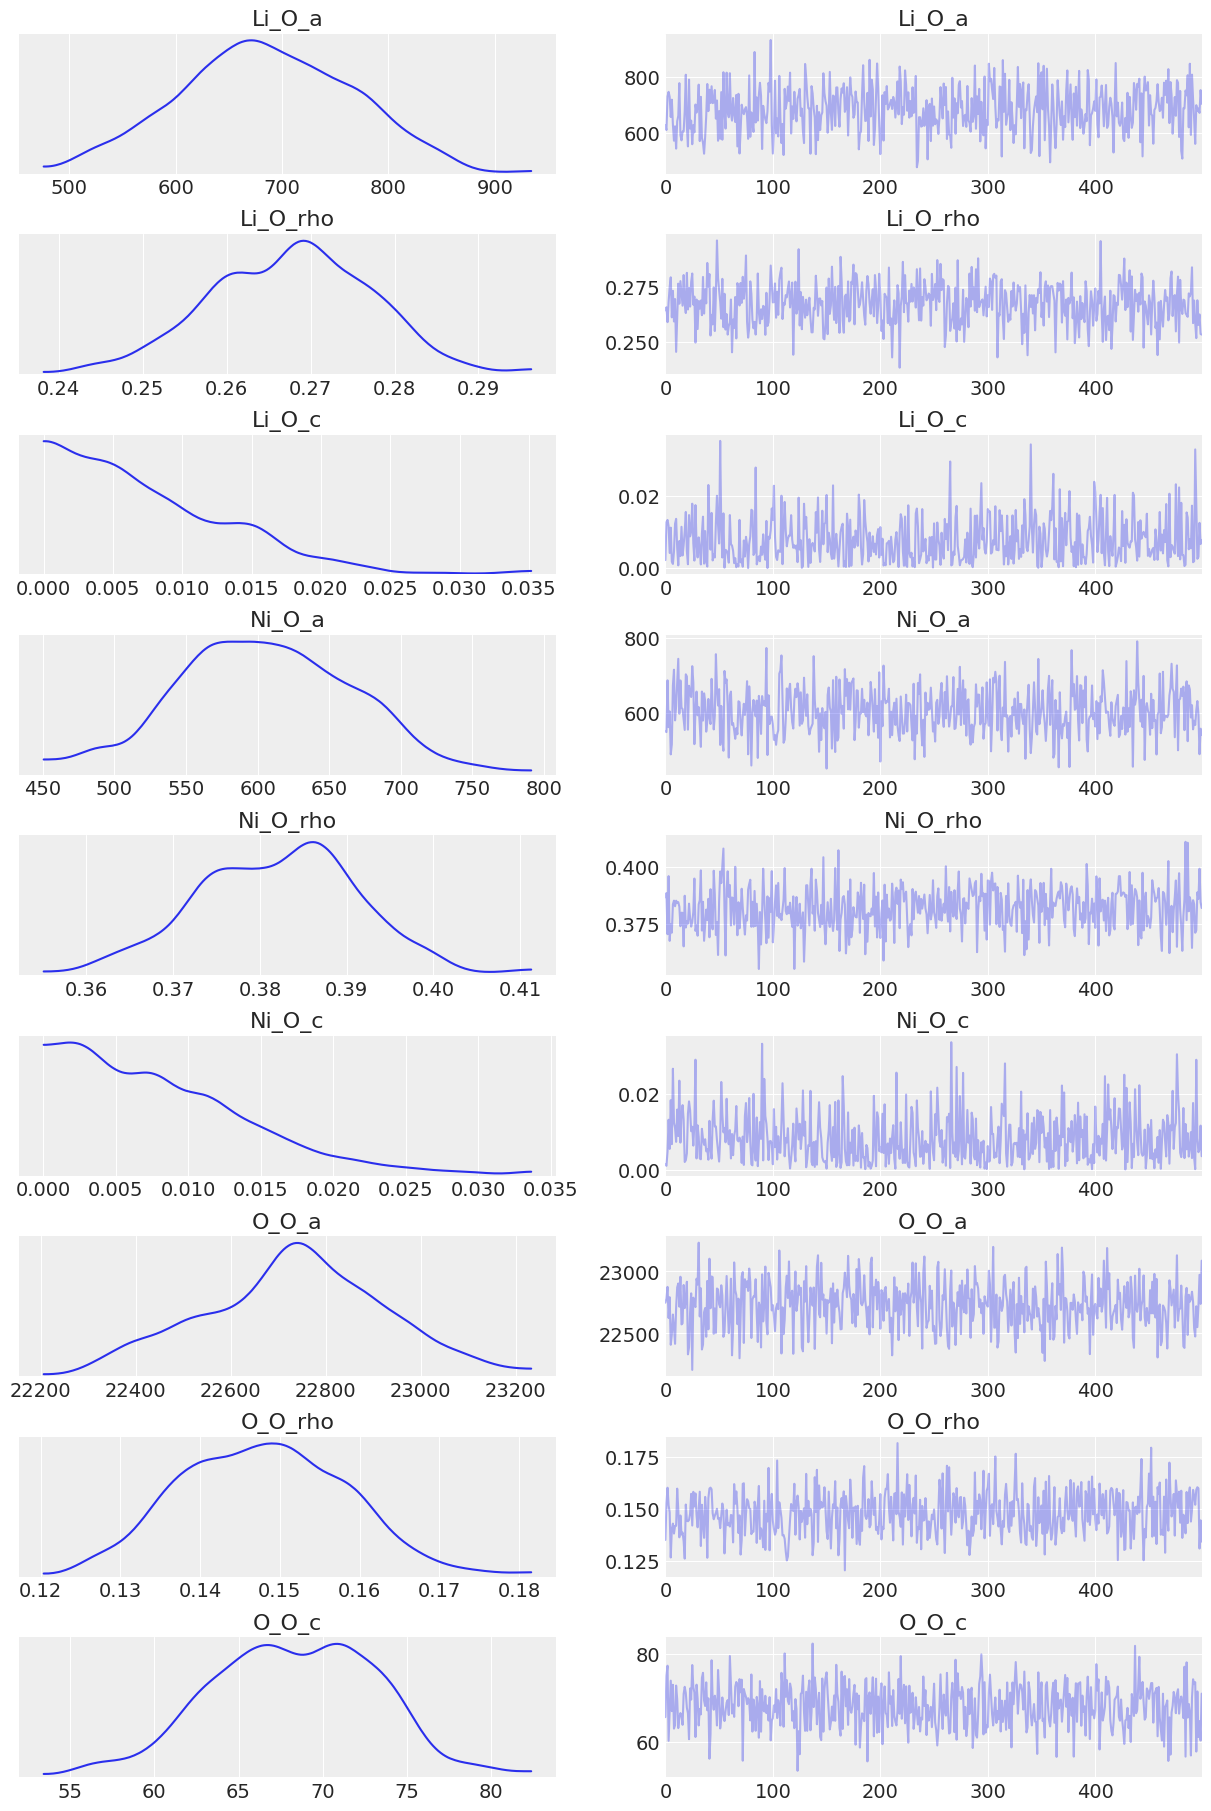

In [42]:
az.style.use('arviz-darkgrid')
pm.plot_trace(trace)
plt.savefig('test_trace.png',dpi=500, bbox_inches = "tight")

/Users/lmm82/.pyenv/versions/3.7.3/lib/python3.7/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


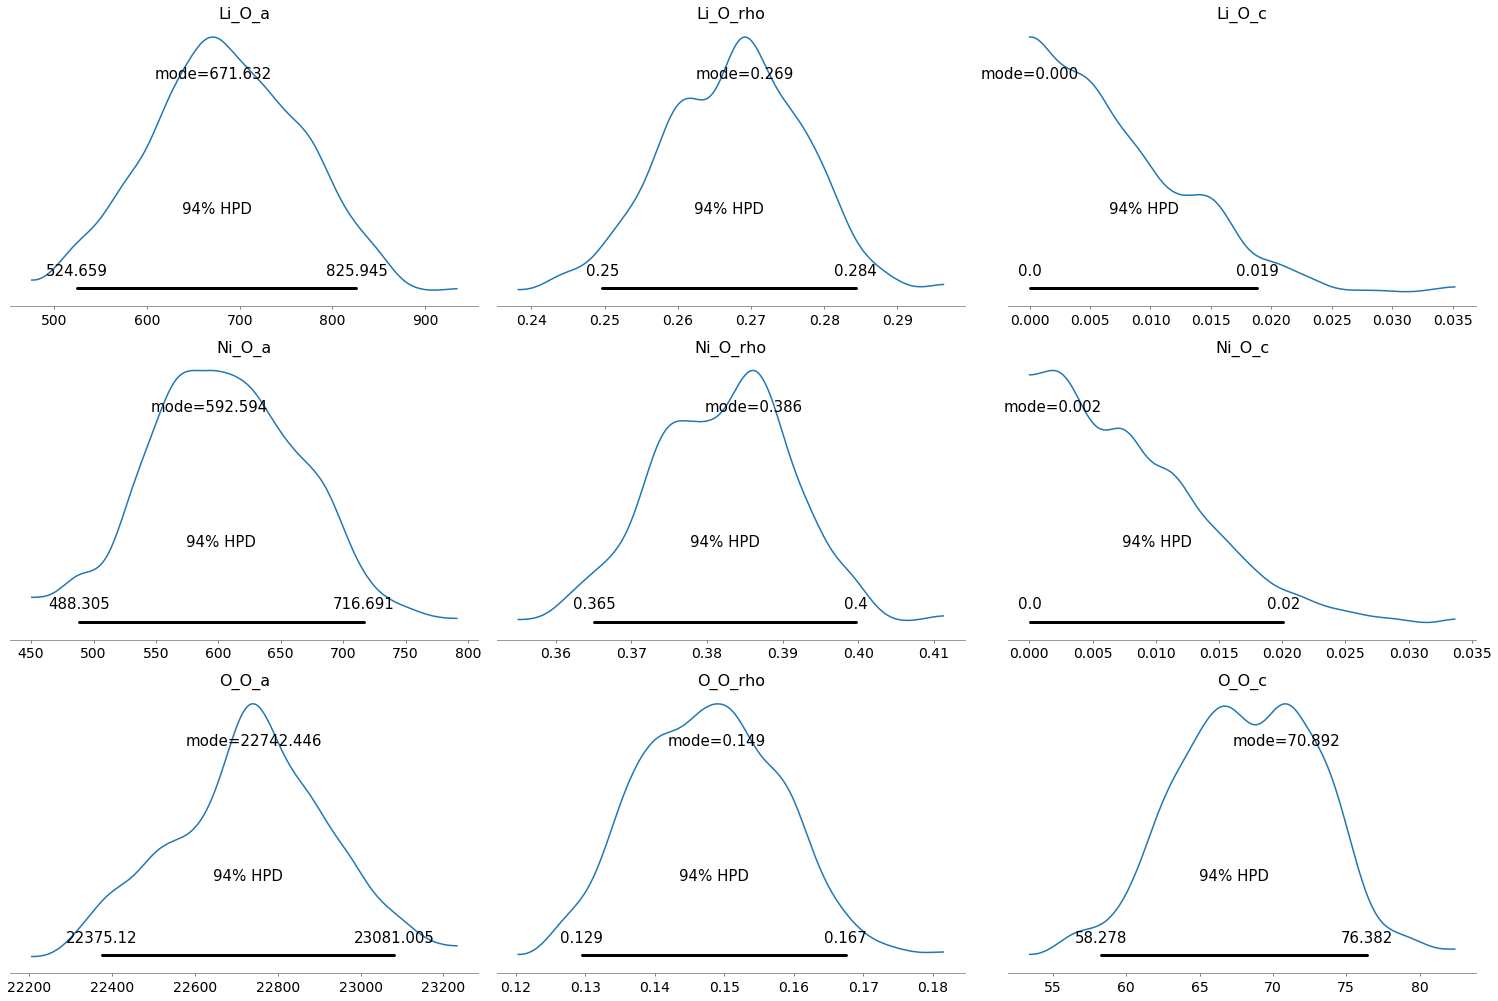

In [8]:
pm.plot_posterior(trace, round_to = 3, point_estimate = 'mode')
plt.savefig('test_mode.png',dpi=500, bbox_inches = "tight")

In [7]:
filename = 'summary.txt'
with open('summary.txt', 'a') as file:
    pm.summary(trace).to_csv(filename, index=False)

In [67]:
modes = []
for var in trace.varnames:
    data_points = trace.get_values(var)
    mode = stats.mode(data_points)
    modes.append(mode)

In [ ]:
# # ALTERNATIVE TO VASPPY
# from pymatgen.io.vasp.outputs import Outcar
# def get_forces(outcar):
#     data = outcar.read_table_pattern(header_pattern=r"\sPOSITION\s+TOTAL-FORCE \(eV/Angst\)\n\s-+",
#                                      row_pattern=r"\s+[+-]?(\d+\.\d+)\s+[+-]?(\d+\.\d+)\s+[+-]?(\d+\.\d+)\s+([+-]?\d+\.\d+)\s+([+-]?\d+\.\d+)\s+([+-]?\d+\.\d+)",
#                                      footer_pattern=r"\s--+",
#                                      postprocess=lambda x: float(x),
#                                      last_one_only=False)
#     forces = []
#     for atom_data in data[-1]:
#         xyz_force = atom_data[3:]
#         forces.append(xyz_force)
#     return forces
# outcar = Outcar("OUTCAR")
# forces = get_forces(outcar)